### set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [5]:

import tensorflow as tf

# Load the MNIST dataset directly
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Reshaping to (28,28,1) for grayscale
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Check the shape of the data
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


### Define a CNN model and train the model

In [2]:
model = models.Sequential()

# Add convolutional layers with ReLU activation and max pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output and add fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes (digits 0-9)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### train the model

In [7]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8730 - loss: 0.4225 - val_accuracy: 0.9864 - val_loss: 0.0465
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9824 - loss: 0.0553 - val_accuracy: 0.9880 - val_loss: 0.0345
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9894 - loss: 0.0334 - val_accuracy: 0.9895 - val_loss: 0.0334
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9914 - loss: 0.0267 - val_accuracy: 0.9862 - val_loss: 0.0404
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9937 - loss: 0.0210 - val_accuracy: 0.9844 - val_loss: 0.0476
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9944 - loss: 0.0177 - val_accuracy: 0.9891 - val_loss: 0.0341
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9956 - loss: 0.0135 - val_accuracy: 0.9906 - val_loss: 0.0318
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9960 - loss: 0.0115 - 

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# svm = SVC(kernel='linear')  # You can also try 'rbf' kernel for better performance
# svm.fit(x_train, y_train)

### Evaluate the model

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9919 - loss: 0.0338
Test accuracy: 0.9932000041007996


### visulaize the results

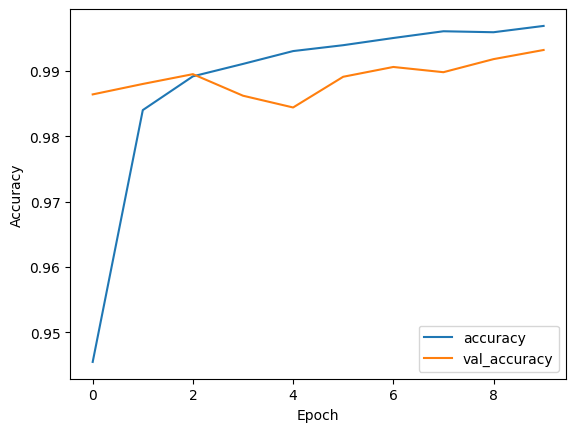

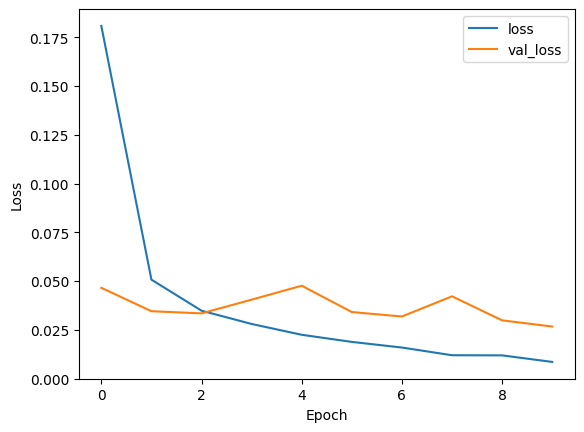

In [10]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


### make predictions

In [25]:
print(len(y_test))

10000


In [26]:
# Predicting a sample image
image = x_test[500]  # Get the first image from the validation set
print(y_test[500])
image = np.expand_dims(image, axis=0)  # Add batch dimension
prediction = model.predict(image)
print(f"Predicted label: {np.argmax(prediction)}")


3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted label: 3


### Testing with my images

In [13]:
import cv2
import numpy as np
import tensorflow as tf

### showing an image

In [16]:
import matplotlib.pyplot as plt

In [15]:
def show_image(image_file,title="original image",cmap=None):
  plt.imshow(image_file,cmap=cmap)
  plt.title(title)
  plt.axis("off")
  plt.show()

In [14]:
def preprocess_image(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise ValueError(f"Image not found at path {image_path}")
    
    # Resize image to 28x28 pixels
    image = cv2.resize(image, (28, 28))
    
    # Normalize pixel values to be in the range [0, 1]
    image = image / 255.0
    
    # Expand dimensions to match the input shape (1, 28, 28, 1) for batch size of 1
    image = np.expand_dims(image, axis=-1)  # add channel dimension
    image = np.expand_dims(image, axis=0)   # add batch dimension
    
    return image.astype(np.float32)



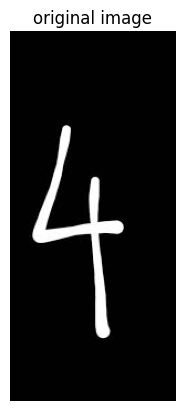

In [36]:
image_path = 'numbers/four2.jpeg'
org_img= cv2.imread(image_path)
show_image(org_img,"original image")
processed_image = preprocess_image(image_path)
# show_image(preprocess_image,"pre proccessed Image")r

In [37]:
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions, axis=-1)

print(f"Predicted Class: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Class: 8


### saving the model

In [12]:
model.save('digit_recognizer_model_1.h5')
